# Clustering Analysis
This notebook includes the clustering analysis part of the <a href="https://orikatz.wordpress.com/2019/11/29/israel_clustering/">blog post</a>.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set(color_codes=True)
import os

Loading data (the files can be found in the data folder of the project):

In [14]:
periods = ["1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2014"]
countries_years={}
for i in periods:
    countries_years[i] = pd.read_csv('data\\countries_'+str(i)+'.csv', index_col = 6)

Scaling and clustering:

In [15]:
scaler = StandardScaler()
    
for j in np.arange(0.5, 12, 0.5):
    
    dbscan = DBSCAN(min_samples = 5, eps = j)
    
    for i in periods:
        data = countries_years[i].to_numpy()
        data = scaler.fit_transform(data)
        clusters = dbscan.fit_predict(data)
        countries_years[i]['type_'+str(j)] = clusters    

2-way pca scatter: <br />
The pca was calculated only according to 1960-1969, so same weights for all decades. If i run different pca for different decades in some of the decades the axis flips, and it is harder to see the trend.


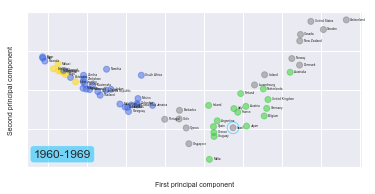

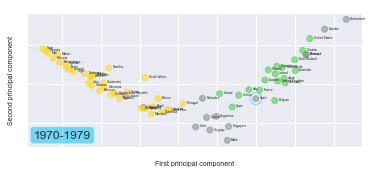

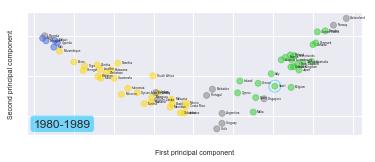

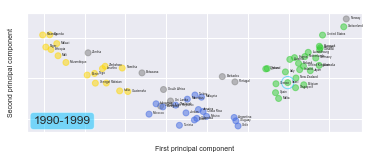

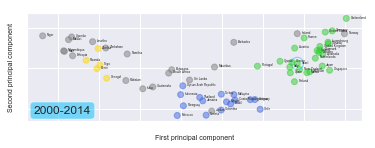

In [16]:
#fitting pca:
pca = PCA(n_components=2)
data = countries_years['1960-1969'][['gdppc_maddison', 'telephone', 
                               'urban', 'fertility', 'hc', 'survival_65']].to_numpy()
data = scaler.fit_transform(data)
pca.fit(data)

#adding the results to the data:
for i in periods:  
    data = countries_years[i][['gdppc_maddison', 'telephone', 
                               'urban', 'fertility', 'hc', 'survival_65']].to_numpy()
    data = scaler.fit_transform(data)
    data_pca = pca.transform(data)
    
    countries_years[i]['pc_1'] = data_pca[:, 0]
    countries_years[i]['pc_2'] = data_pca[:, 1]
    countries_years[i]['country'] = countries_years[i].index
    
    uknum = countries_years[i].loc['United Kingdom']['type_1.0'] #this is needed to get the same color for each group in all the years  
    beninnum = countries_years[i].loc['Benin']['type_1.0']   
    countries_years[i]['colors'] = np.where(countries_years[i]['type_1.0'] == uknum,"limegreen", 
                  np.where(countries_years[i]['type_1.0'] == -1,"grey",
                  np.where(countries_years[i]['type_1.0'] == beninnum,"gold","royalblue")))

#creating charts:    
for i in periods:   
    x = countries_years[i]['pc_1']
    y = countries_years[i]['pc_2']
    names = countries_years[i]['country']
    x_israel = countries_years[i]['pc_1'].loc[countries_years[i]['country'] == 'Israel']
    y_israel = countries_years[i]['pc_2'].loc[countries_years[i]['country'] == 'Israel']
    colors = countries_years[i]['colors']
        
    plt.figure()
    plt.scatter(x, y, color = colors, alpha=0.5)
    plt.xlabel("First principal component", fontsize = 7)
    plt.ylabel("Second principal component", fontsize = 7)
    
    circle = plt.Circle((x_israel, y_israel), radius=0.15, color = 'deepskyblue', fill=False, alpha=0.5)# a circle around Israel
    ax = plt.gca()
    ax.add_artist(circle)
    ax.set_aspect(1.0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    props = dict(boxstyle='round', facecolor='deepskyblue', alpha=0.5)
    ax.text(0.02, 0.05, i, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)
    
    texts = []
    for j, name in names.iteritems():
        texts.append(plt.text(x[j] + 0.1,  y[j], name, fontsize = 3)) 